Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [ ]:
base_dir = '/content/drive/MyDrive/Prodigy/leapGestRecog'

In [ ]:
images = []
labels = []
for directory in os.listdir(base_dir):
    for subdir in os.listdir(os.path.join(base_dir, directory)):
        for image in os.listdir(os.path.join(base_dir, directory, subdir)):
            img_path = os.path.join(base_dir, directory, subdir, image)
            images.append(img_path)
            labels.append(subdir)

In [ ]:
df = pd.DataFrame({'Image': images, 'Label': labels})
print(df.head())

                                               Image Label
0  /content/drive/MyDrive/Prodigy/leapGestRecog/0...  09_c
1  /content/drive/MyDrive/Prodigy/leapGestRecog/0...  09_c
2  /content/drive/MyDrive/Prodigy/leapGestRecog/0...  09_c
3  /content/drive/MyDrive/Prodigy/leapGestRecog/0...  09_c
4  /content/drive/MyDrive/Prodigy/leapGestRecog/0...  09_c


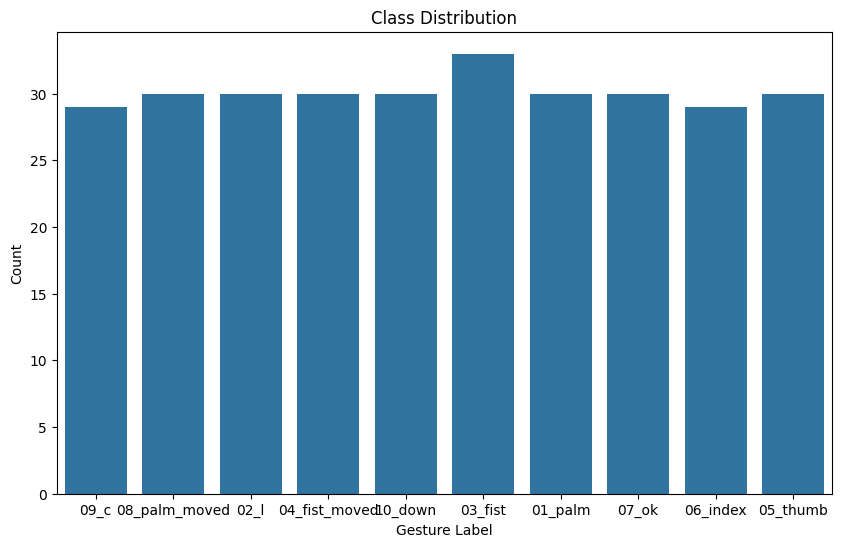

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.xlabel('Gesture Label')
plt.ylabel('Count')
plt.show()

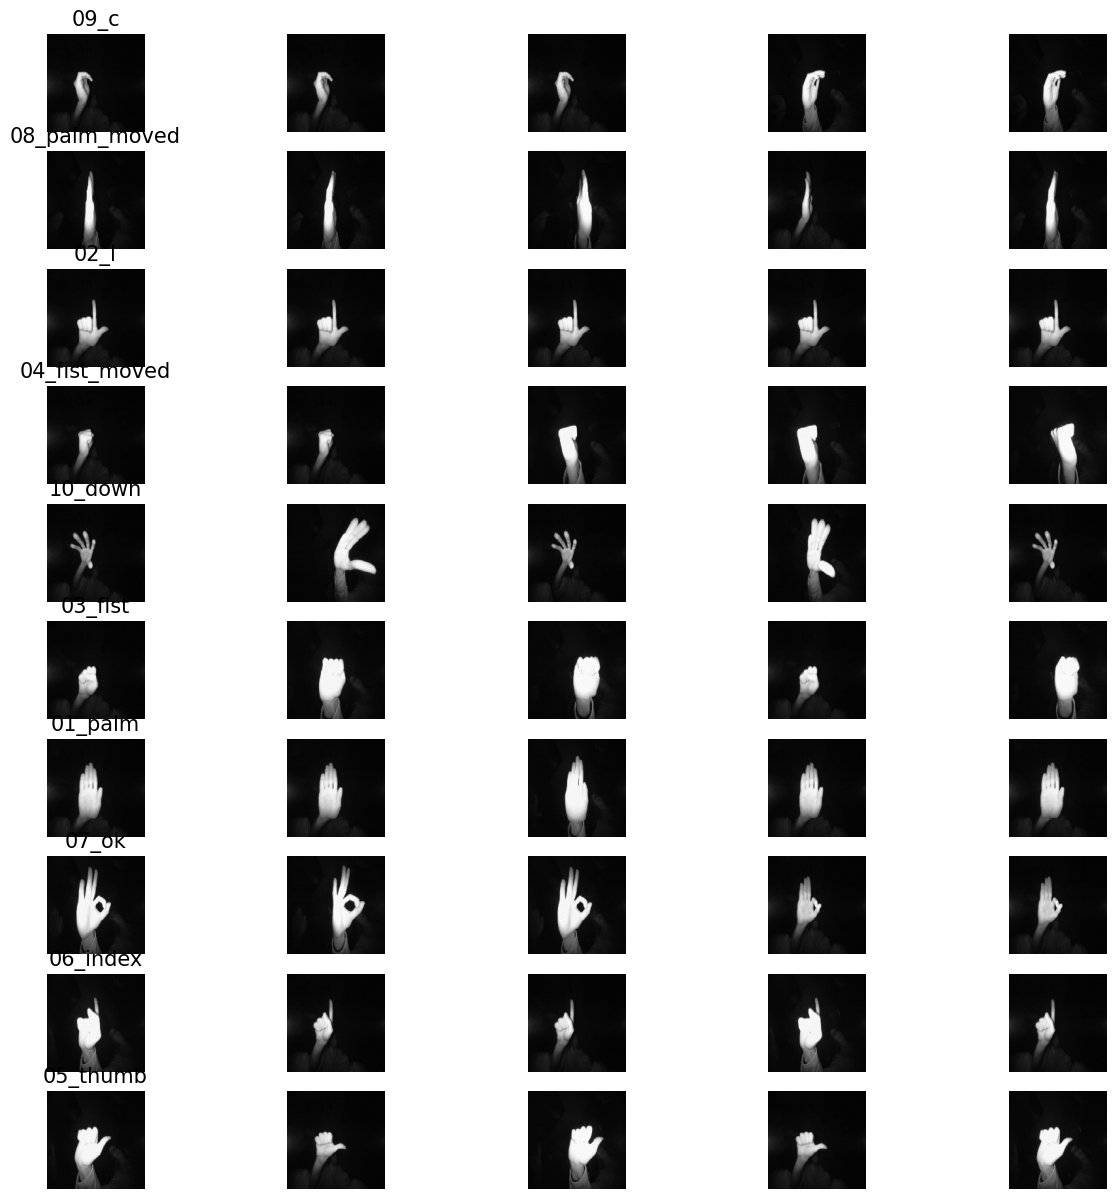

In [ ]:
def display_sample_images(df, img_dir, num_samples=5):
    labels = df['Label'].unique()
    plt.figure(figsize=(15, 15))
    for i, label in enumerate(labels):
        sample_images = df[df['Label'] == label].sample(num_samples)
        for j, img_path in enumerate(sample_images['Image']):
            img = load_img(os.path.join(img_dir, img_path), target_size=(150, 150))
            plt.subplot(len(labels), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.title(label, fontsize=15)
    plt.show()


display_sample_images(df, base_dir)


In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image',
    y_col='Label',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Image',
    y_col='Label',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image',
    y_col='Label',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 210 validated image filenames belonging to 10 classes.
Found 45 validated image filenames belonging to 10 classes.
Found 46 validated image filenames belonging to 10 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(df['Label'].unique())))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_df) // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=len(valid_df) // batch_size
)


Epoch 1/20
6/6 [==============================] - 49s 7s/step - loss: 2.3045 - accuracy: 0.1461 - val_loss: 2.2772 - val_accuracy: 0.1562
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 2.2190 - accuracy: 0.2135 - val_loss: 2.2073 - val_accuracy: 0.1875
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 2.0109 - accuracy: 0.2865 - val_loss: 1.8942 - val_accuracy: 0.4688
Epoch 4/20
6/6 [==============================] - 8s 1s/step - loss: 1.7632 - accuracy: 0.4045 - val_loss: 1.5719 - val_accuracy: 0.6250
Epoch 5/20
6/6 [==============================] - 10s 1s/step - loss: 1.4012 - accuracy: 0.5573 - val_loss: 1.0876 - val_accuracy: 0.8438
Epoch 6/20
6/6 [==============================] - 19s 3s/step - loss: 1.1612 - accuracy: 0.6180 - val_loss: 0.8526 - val_accuracy: 0.8438
Epoch 7/20
6/6 [==============================] - 9s 2s/step - loss: 1.0063 - accuracy: 0.6292 - val_loss: 0.6758 - val_accuracy: 0.7812
Epoch 8/20
6/6 [====================

1/1 [==============================] - 1s 757ms/step - loss: 0.0040 - accuracy: 1.0000
Test accuracy: 1.0


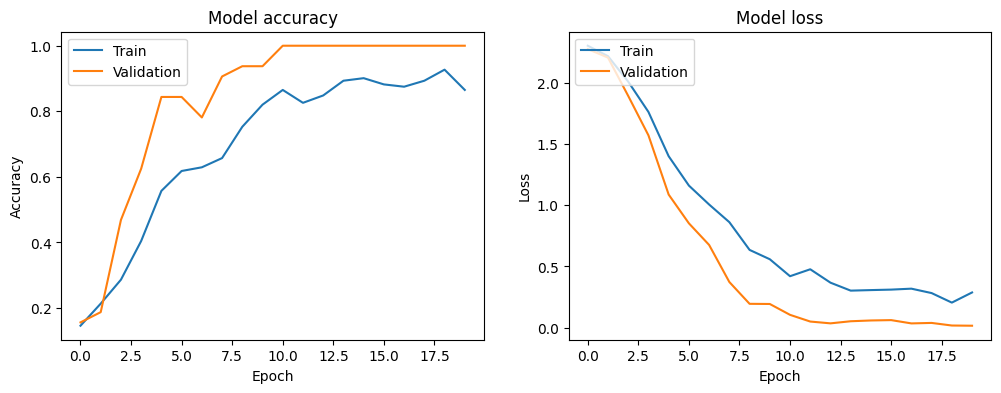

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_df) // batch_size)
print('Test accuracy:', test_acc)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
model.save('hand_gesture_recognition_model.h5')
model = load_model('hand_gesture_recognition_model.h5')

1/1 [==============================] - 0s 33ms/step


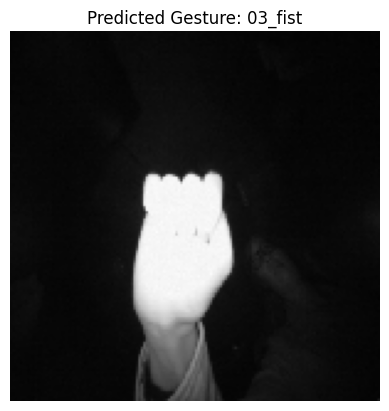

Predicted class index: 2
Prediction probabilities: [[4.4590321e-05 1.8763605e-05 9.9349070e-01 8.7100612e-05 5.9447414e-03
  4.1555240e-06 6.9817980e-07 2.0879590e-06 4.0710508e-04 6.0919056e-08]]
Predicted gesture: 03_fist


In [ ]:
def predict_gesture(img_path, model, class_mapping):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_gesture = class_mapping[predicted_class]
    plt.imshow(img)
    plt.title(f'Predicted Gesture: {predicted_gesture}')
    plt.axis('off')
    plt.show()

    return predicted_class, predicted_gesture, prediction
img_path = '/content/drive/MyDrive/Prodigy/leapGestRecog/00/03_fist/frame_00_03_0176.png'
class_mapping = {v: k for k, v in train_generator.class_indices.items()}
predicted_class, predicted_gesture, prediction = predict_gesture(img_path, model, class_mapping)
print("Predicted class index:", predicted_class)
print("Prediction probabilities:", prediction)
print("Predicted gesture:", predicted_gesture)
